<a href="https://colab.research.google.com/github/Kishorecsmani/Myproject/blob/main/FitnessCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
To provide a better recommendation of the treadmills to the new customers and investigate whether there are differences across the product with respect to customer characteristics.

<font color='33A2FF'><b>1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset</b></font>


In [ ]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
! gdown 12_gX5HfRMiupaEdEJlV9h20GH3rODKF8

In [ ]:
df=pd.read_csv('treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#length of data
len(df)

180

In [ ]:
#checking datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#number of unique values in our data
for i in df.columns:
 print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [ ]:
# describe on column having integer data type
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# describe on column having non integer type 
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## **UNIVARIATE ANALYSIS**

<font color='33A2FF'><b>2. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)</b></font>

<font color='33A2FF'><b>3. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)</b></font>

In [ ]:
# Function to calculate outlier range
def outlier(i):
    r = 1.5 * stats.iqr(df[i])
    lb = max(np.percentile(df[i], 25) - r, 0)
    ub = np.percentile(df[i], 75) + r
    print(i)
    print("Outliers:",sum(df[i] > ub) + sum(df[i] < lb))
    print("Lower limit", lb)
    print("Upper limit", ub)

In [ ]:
df.Age.describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
outlier("Age")

Age
Outliers: 5
Lower limit 10.5
Upper limit 46.5


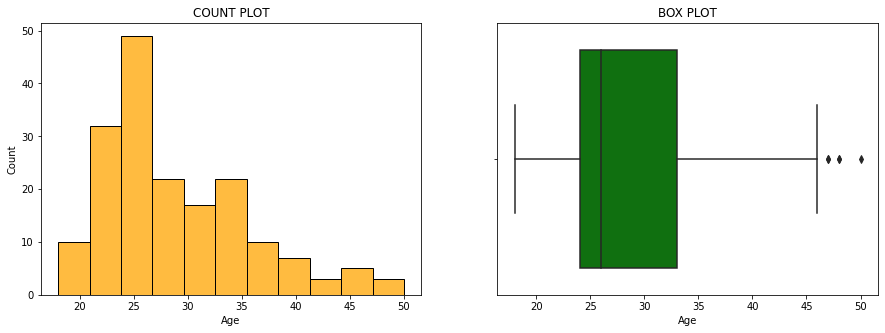

In [ ]:
# AGE
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("COUNT PLOT")
sns.histplot(data = df, x= 'Age', color = 'orange')
plt.subplot(1,2,2)
plt.title("BOX PLOT")
sns.boxplot(x = 'Age', data = df, color = 'green')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals of Age 26 years has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target the individuals with age around 26 years </font>

<font color='#0dab7f'><b>Outlier</b> : Age - Lower limit 10.5 and upper limit 46.5 with 4 values out of range</font>

In [ ]:
df.Education.describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [ ]:
outlier("Education")

Education
Outliers: 4
Lower limit 11.0
Upper limit 19.0


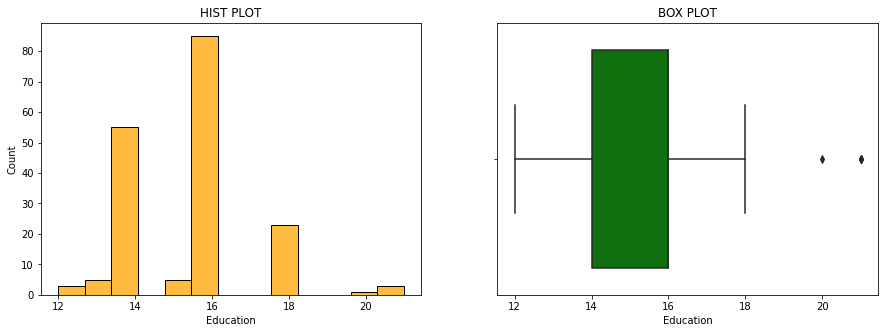

In [ ]:
# EDUCATION
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("HIST PLOT")
sns.histplot(data = df, x= 'Education', color = 'orange')
plt.subplot(1,2,2)
plt.title("BOX PLOT")
sns.boxplot(x = 'Education', data = df, color = 'green')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals having 16 years of education has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target individuals who is having 16 years of Education</font>

<font color='#0dab7f'><b>Outlier</b> : Education - Lower limit 11 and upper limit 19 with 4 values out of range</font>

In [ ]:
df.Usage.describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [ ]:
outlier("Usage")

Usage
Outliers: 9
Lower limit 1.5
Upper limit 5.5


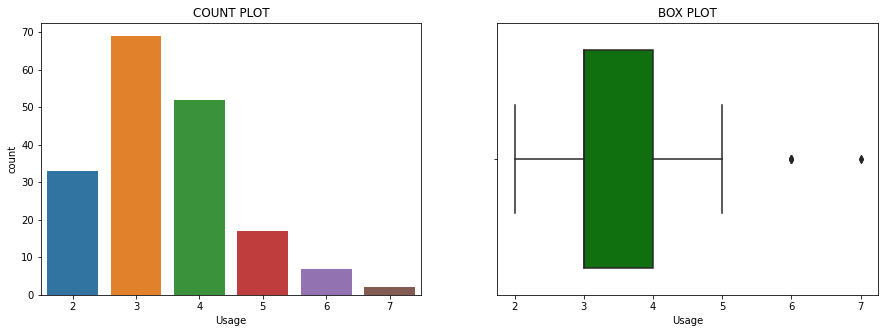

In [ ]:
# USAGE
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Usage')
plt.subplot(1,2,2)
plt.title("BOX PLOT")
sns.boxplot(x = 'Usage', data = df, color = 'green')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Customers planning to use 3 days a week has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target the individuals who uses treadmill atleast 3 days a week</font>

<font color='#0dab7f'><b>Outlier</b> : Usage - Lower limit 1.5 and upper limit 5.5 with 9 values out of range</font>

In [ ]:
df.Fitness.describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [ ]:
outlier("Fitness")

Fitness
Outliers: 2
Lower limit 1.5
Upper limit 5.5


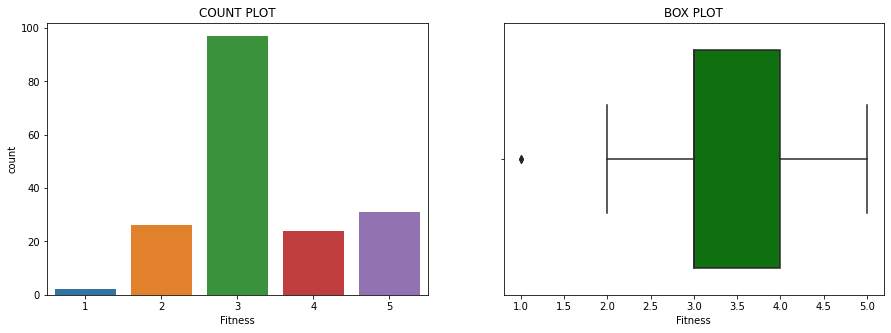

In [ ]:
# Fitness
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Fitness')
plt.subplot(1,2,2)
plt.title("BOX PLOT")
sns.boxplot(x = 'Fitness', data = df, color = 'green')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Customers with fitness scale of 3 has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target individuals having fitness scale of 3</font>

<font color='#0dab7f'><b>Outlier</b> : Fitness - Lower limit 1.5 and upper limit 5.5 with 2 values out of range</font>

In [ ]:
df.Income.describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
outlier("Income")

Income
Outliers: 19
Lower limit 22144.875
Upper limit 80581.875


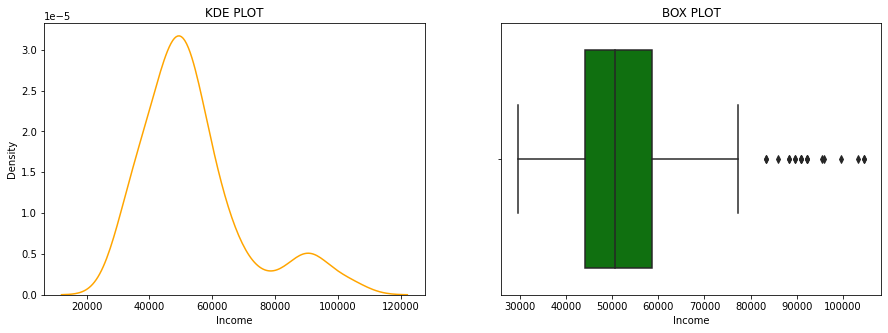

In [ ]:
# Income
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("KDE PLOT")
sns.kdeplot(data = df, x= 'Income', color = 'orange')
plt.subplot(1,2,2)
plt.title("BOX PLOT")
sns.boxplot(x = 'Income', data = df, color = 'green')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals with Annual income around 50000$ has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target individuals having Annual salary 50000 dollars</font>

<font color='#0dab7f'><b>Outlier</b> : Income - Lower limit 22144.875 and upper limit 80581.875 with 19 values out of range</font>

In [ ]:
df.Miles.describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
outlier("Miles")

Miles
Outliers: 13
Lower limit 0
Upper limit 187.875


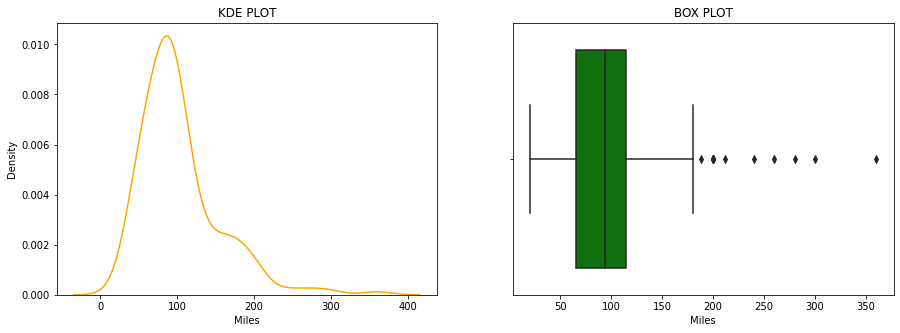

In [ ]:
# Miles
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("KDE PLOT")
sns.kdeplot(data = df, x= 'Miles', color = 'orange')
plt.subplot(1,2,2)
plt.title("BOX PLOT")
sns.boxplot(x = 'Miles', data = df, color = 'green')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals with 94 miles walk/run per week has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target individuals having 94 miles walk/run per week</font>

<font color='#0dab7f'><b>Outlier</b> : Miles - Lower limit 0 and upper limit 187.875 with 13 values out of range</font>

In [ ]:
df.Product.describe()

count       180
unique        3
top       KP281
freq         80
Name: Product, dtype: object

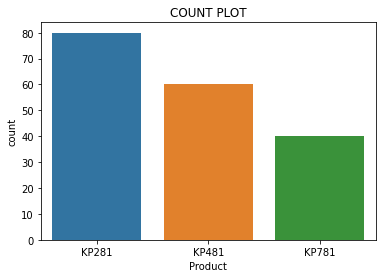

In [ ]:
#	Product
plt.figure()
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals has shown more interest on KP281 treadmill product</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target individuals  product with KP281 product</font>

In [ ]:
df.Gender.describe()

count      180
unique       2
top       Male
freq       104
Name: Gender, dtype: object

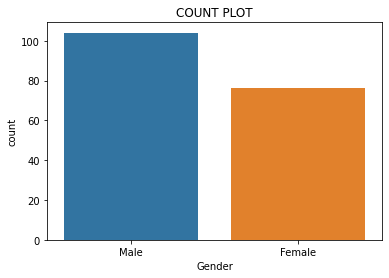

In [ ]:
#	Gender
plt.figure()
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Gender')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Male individuals has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target male individuals</font>

In [ ]:
df.MaritalStatus.describe()

count           180
unique            2
top       Partnered
freq            107
Name: MaritalStatus, dtype: object

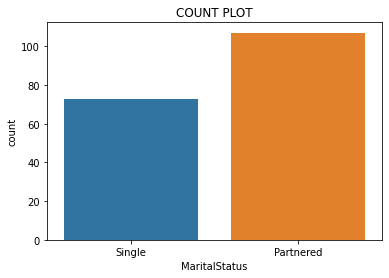

In [ ]:
#	MaritalStatus
plt.figure()
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'MaritalStatus')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals who are partnered has purchased more treadmill </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target individuals who are Partnered</font>

## **BIVARIATE ANALYSIS**

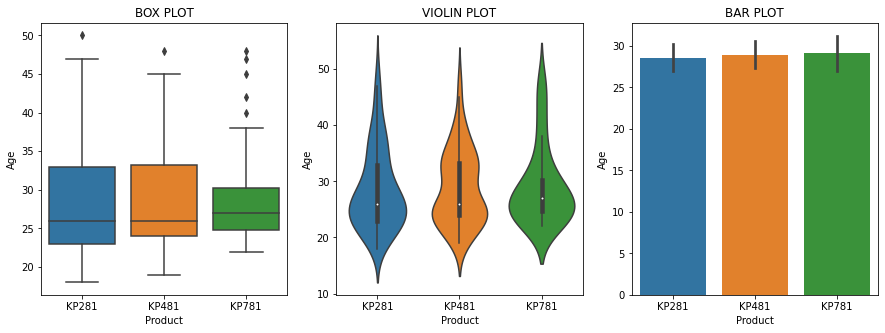

In [ ]:
# Product vs Age
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("BOX PLOT")
sns.boxplot(data = df, x= 'Product', y='Age')

plt.subplot(1,3,2)
plt.title("VIOLIN PLOT")
sns.violinplot(data = df, x= 'Product', y='Age')

plt.subplot(1,3,3)
plt.title("BAR PLOT")
sns.barplot(data = df, x= 'Product', y='Age')
plt.show()

<font color='#0dab7f'><b>Observation</b>: Individuals with age group (23 - 33 years) purchased more treadmill and has shown more interest towards KP281 treadmill product</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target the age group 23 to 33 years old and can suggest KP281 product to new customers </font>

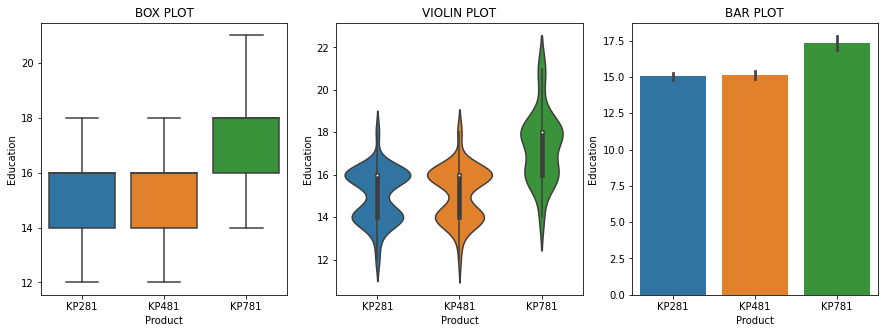

In [ ]:
# Product vs Education
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("BOX PLOT")
sns.boxplot(data = df, x= 'Product', y='Education')

plt.subplot(1,3,2)
plt.title("VIOLIN PLOT")
sns.violinplot(data = df, x= 'Product', y='Education')

plt.subplot(1,3,3)
plt.title("BAR PLOT")
sns.barplot(data = df, x= 'Product', y='Education')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
1) Individuals with Education of 16-18 years purchased KP781  treadmill product. 
2) Individuals with Education of 14-16 years purchased KP281 and KP481  treadmill product.
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target:- 
1) Customers having 16 - 18 years education with KP781 product 2) Customers having 14 - 16 years education with KP281 and KP481 product</font>

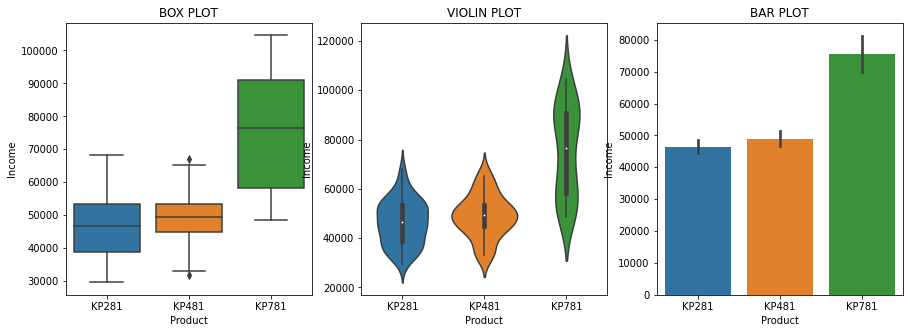

In [ ]:
# Product vs Income
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("BOX PLOT")
sns.boxplot(data = df, x= 'Product', y='Income')

plt.subplot(1,3,2)
plt.title("VIOLIN PLOT")
sns.violinplot(data = df, x= 'Product', y='Income')

plt.subplot(1,3,3)
plt.title("BAR PLOT")
sns.barplot(data = df, x= 'Product', y='Income')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
1) Individuals with yearly income 60000 to 90000 dollars purchased KP781(Advanced) treadmill product. 
2) Individuals with yearly income 45000 to 53000 dollars purchased KP481 (Mid level)  treadmill product. 
3) Individuals with yearly income 40000 to 53000 dollars purchased KP281 (Entry level)  treadmill product. 
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target:- 
1) Customers having yearly income 60000 to 90000 dollars with KP781 product 2) Customers having yearly income 45000 to 53000 dollars with KP481 product 3) Customers having yearly income 40000 to 53000 dollars with KP281 product</font>

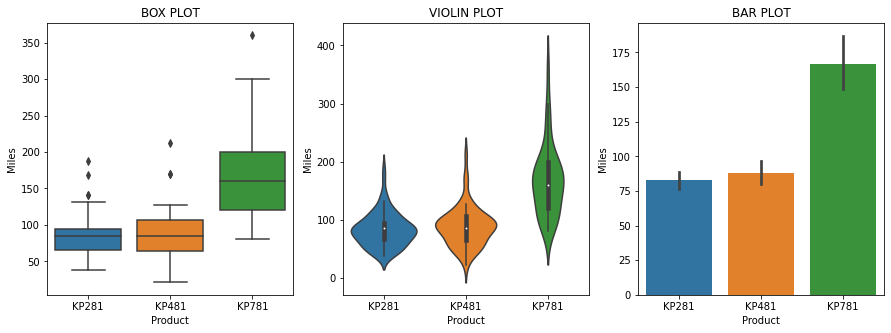

In [ ]:
# Product vs Miles
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("BOX PLOT")
sns.boxplot(data = df, x= 'Product', y='Miles')

plt.subplot(1,3,2)
plt.title("VIOLIN PLOT")
sns.violinplot(data = df, x= 'Product', y='Miles')

plt.subplot(1,3,3)
plt.title("BAR PLOT")
sns.barplot(data = df, x= 'Product', y='Miles')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
1) Individuals with average 78 miles walk/run per week purchased KP281, KP481  treadmill product. 
2) Individuals with average 170 miles walk/run per week purchased KP781  treadmill product. 
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target:- 
1) Customers who walks/runs for 78 miles average per week with KP281 and KP481 product
2) Customers who walks/runs for 170 miles average per week with KP781 product</font>

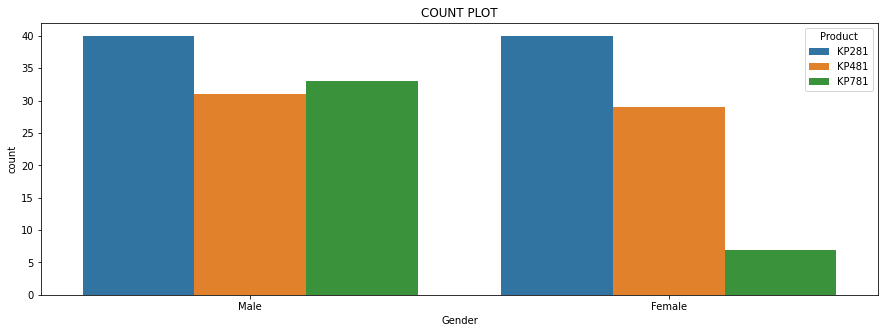

In [ ]:
# Product vs GENDER
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Gender', hue='Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Both Male and Female has shown interest on KP281 product  
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target KP281 to new customers </font>

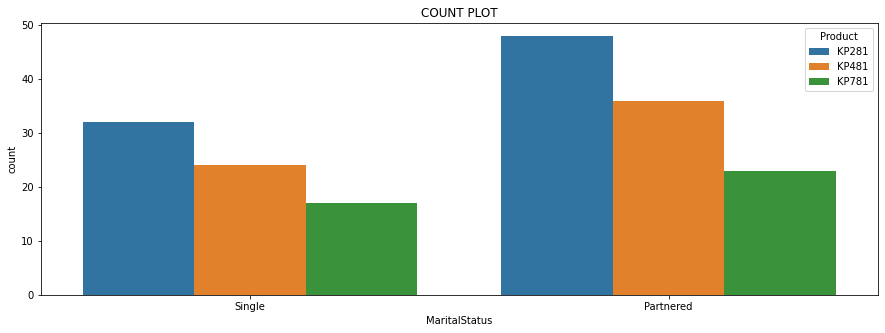

In [ ]:
# Product vs MaritalStatus
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'MaritalStatus', hue='Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Partnered has shown more interest on KP281 product  
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target KP281 to partnered customers </font>

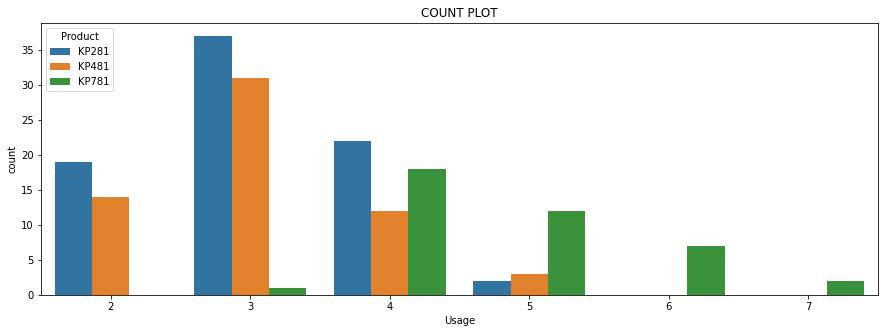

In [ ]:
# Product vs Usage
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Usage', hue='Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Individuals using 3 days a week has shown more interest towards treadmill 
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target to customers who is using 3 days week</font>

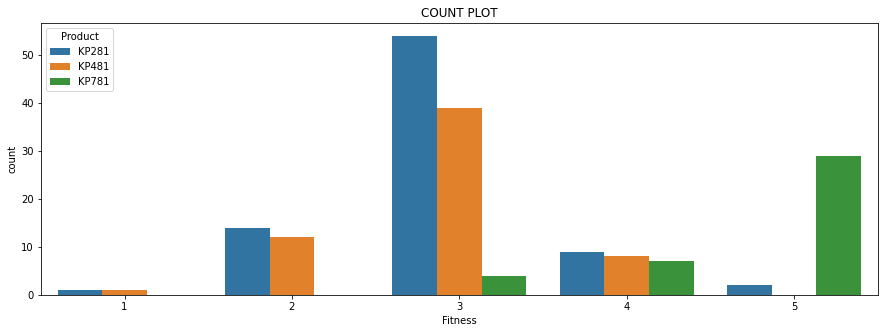

In [ ]:
# Product vs Fitness
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
plt.title("COUNT PLOT")
sns.countplot(data = df, x= 'Fitness', hue='Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Individuals with fitnes scale of 3 has shown more interest towards treadmill 
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target to customers who is having scale of 3</font>

## **MULTIVARIATE ANALYSIS**

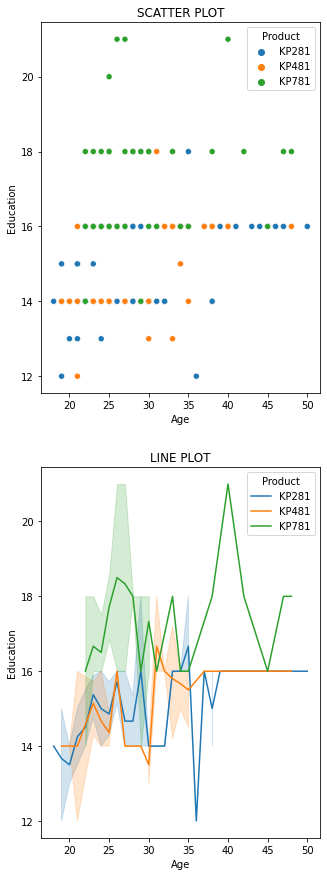

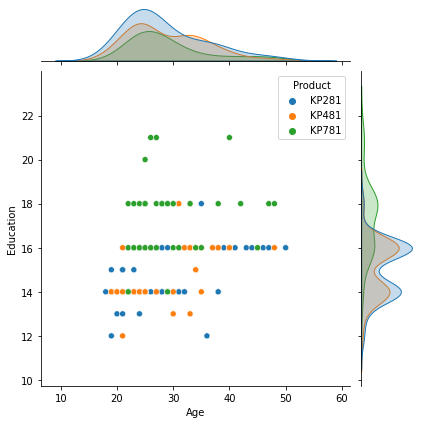

In [ ]:
# Age vs Education vs Product

plt.figure(figsize=(5,15))
plt.subplot(2,1,1)
plt.title("SCATTER PLOT")
sns.scatterplot(data = df, x= 'Age', y='Education', hue = 'Product')

plt.subplot(2,1,2)
plt.title("LINE PLOT")
sns.lineplot(data = df, x= 'Age', y='Education', hue = 'Product')


sns.jointplot(data = df, x= 'Age', y='Education', hue = 'Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Individuals with Age 35 to 40 years and Education of 18 to 20 years are going for Advanced product KP781 
</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can suggest Advanced product KP781 to Age group 35 to 40 years who is having Education of 18 to 20 years </font>

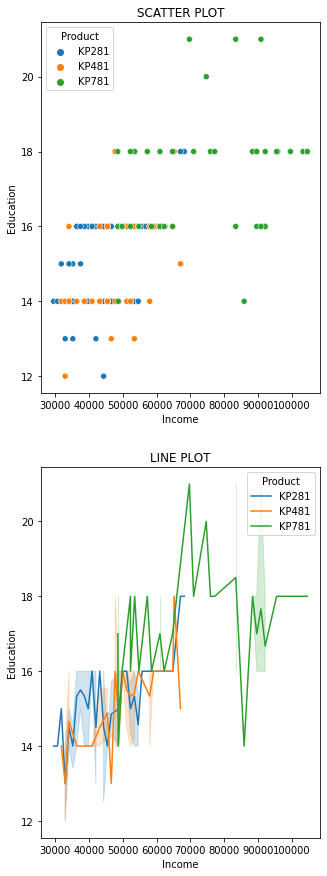

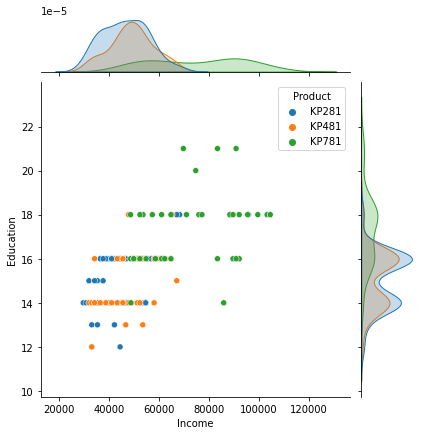

In [ ]:
# Education vs Income vs Product

plt.figure(figsize=(5,15))
plt.subplot(2,1,1)
plt.title("SCATTER PLOT")
sns.scatterplot(data = df, x= 'Income', y='Education', hue = 'Product')

plt.subplot(2,1,2)
plt.title("LINE PLOT")
sns.lineplot(data = df, x= 'Income', y='Education', hue = 'Product')


sns.jointplot(data = df, x= 'Income', y='Education', hue = 'Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Individuals with more income and more education years purchase advanced product KP781 </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can suggest Advanced product KP781 to individuals having more income having high education </font>

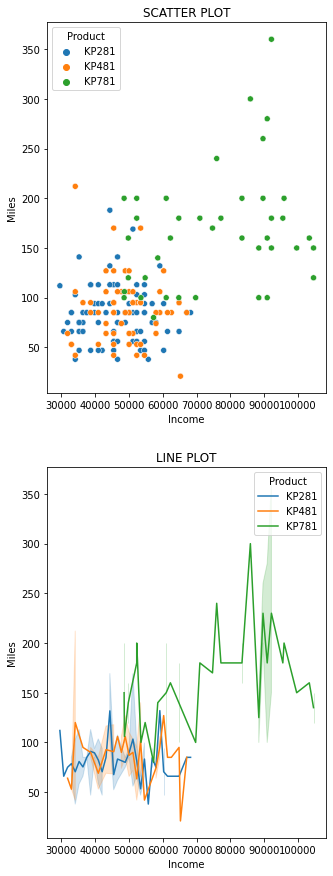

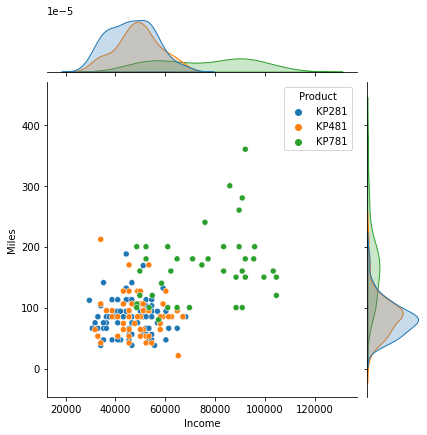

In [ ]:
# Miles vs Income vs Product

plt.figure(figsize=(5,15))
plt.subplot(2,1,1)
plt.title("SCATTER PLOT")
sns.scatterplot(data = df, x= 'Income', y='Miles', hue = 'Product')

plt.subplot(2,1,2)
plt.title("LINE PLOT")
sns.lineplot(data = df, x= 'Income', y='Miles', hue = 'Product')


sns.jointplot(data = df, x= 'Income', y='Miles', hue = 'Product')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Individuals with more income and more miles per week purchased advanced product KP781 </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can suggest Advanced product KP781 to individuals having more income having miles per week </font>

**CORRELATION MATRIX**

<font color='33A2FF'><b>5. Check correlation among different factors using heat maps or pair plots.</b></font>

In [ ]:
df_corr = df.corr()
df_corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


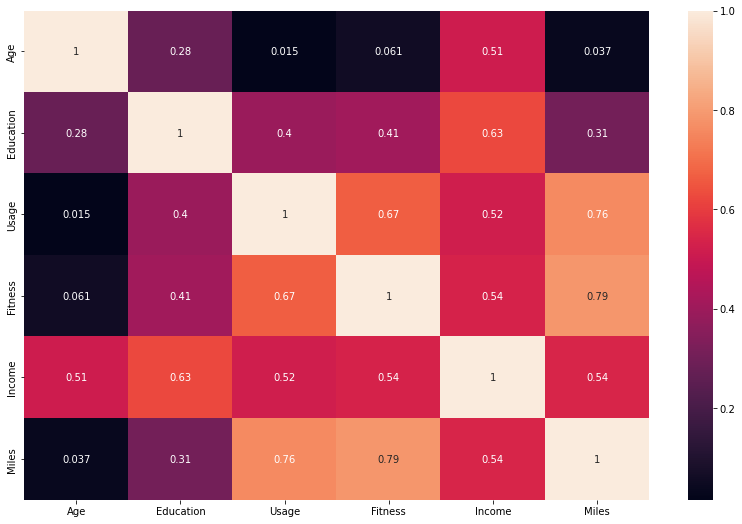

In [ ]:
# HeatMap: All continuos variables

plt.subplots(figsize=(14, 9))
sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values, annot = True)
plt.show()

**PAIR PLOT**

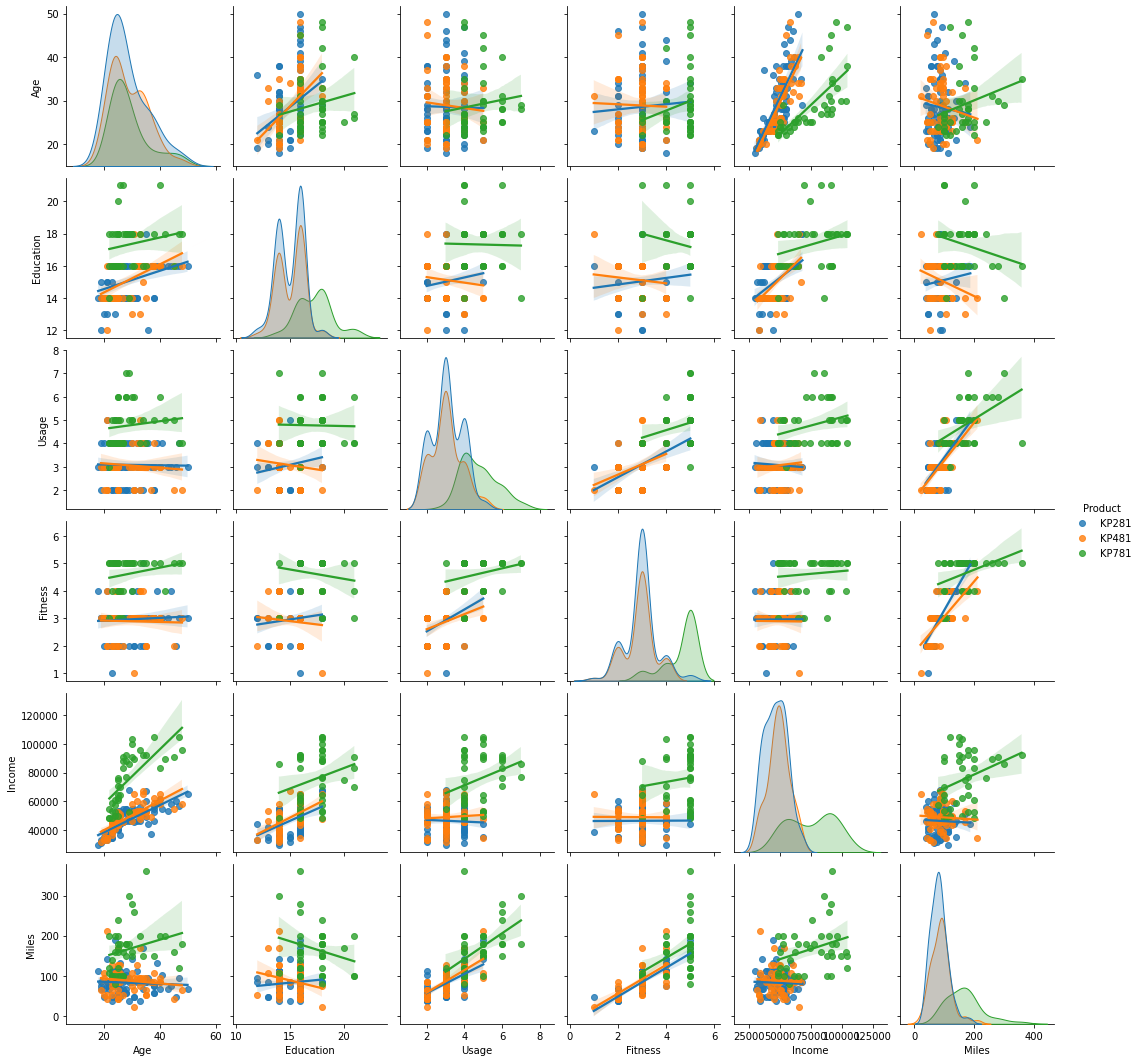

In [ ]:
sns.pairplot(data=df, hue = 'Product', kind ='reg')
plt.show()

<font color='#0dab7f'><b>Observation</b>: 
Based on Heatmap and pairplot we can say Fitness and Usage are closely related to each other
</font>

<font color='#0dab7f'><b>Recommendation</b>: As the Fitness and Usage are closely related. We can analyse any one variable with target.</font>

**Dervied Columns**

Added 2 new feature from Age
AgeCategory - Teens, 20s, 30s and Above 40s
AgeGroup - 14-20 , 20-30, 30-40 & 40-60

Added 1 new categorial feature based on the income
IncomeSlab - Low Income, Lower-middle income,Upper-Middle income and High income

In [ ]:
# AgeCategory
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Teens
1,KP281,19,Male,15,Single,2,3,31836,75,Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teens
3,KP281,19,Male,12,Single,3,3,32973,85,Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teens
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,30s
176,KP781,42,Male,18,Single,5,4,89641,200,Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,Above 40s


In [ ]:
# IncomeSlab
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df['IncomeSlab'] = pd.cut(df['Income'], bins_income,labels=labels_income)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teens,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,30s,Upper-Middle income
176,KP781,42,Male,18,Single,5,4,89641,200,Above 40s,High income
177,KP781,45,Male,16,Single,5,5,90886,160,Above 40s,High income
178,KP781,47,Male,18,Partnered,4,5,104581,120,Above 40s,High income


<font color='33A2FF'><b>4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here) </b></font>

<font color='33A2FF'>Product - Gender</font>

<font color='33A2FF'> Product - Incomeslab </font>

<font color='33A2FF'>Product - Fitness </font>

<font color='33A2FF'>Product - AgeCategory </font>

<font color='33A2FF'>Product - MaritalStatus </font>

In [ ]:
# CrossTab and Marginal probability function
def crosstab(col):
  print("CrossTab")
  crosstab_col = pd.crosstab(df['Product'], df[col], margins= True)
  print(crosstab_col)
  crosstab_col.plot(kind='bar',figsize=(10,7))
  plt.show()
  # Marginal Probability - what percent of customers have purchased KP281, KP481, or KP781 
  print("Marginal Probability: what percent of customers have purchased KP281, KP481, or KP781",crosstab_col['All']/df[col].count())

CrossTab
Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180


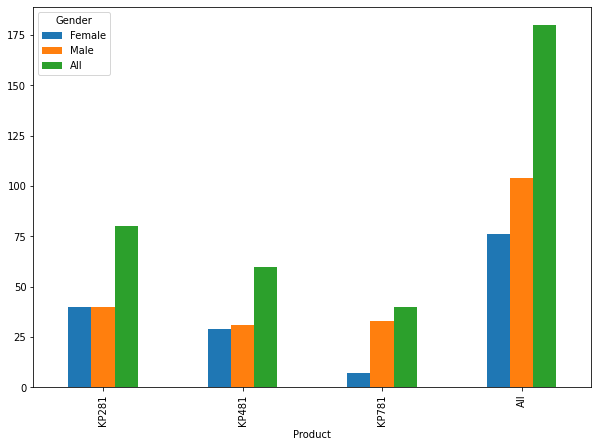

Marginal Probability: what percent of customers have purchased KP281, KP481, or KP781 Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
All      1.000000
Name: All, dtype: float64


In [ ]:
#Product - Gender
crosstab("Gender")

CrossTab
IncomeSlab  Low Income  Lower-middle income  Upper-Middle income  High income  \
Product                                                                         
KP281                8                   66                    6            0   
KP481                6                   47                    7            0   
KP781                0                   11                   12           17   
All                 14                  124                   25           17   

IncomeSlab  All  
Product          
KP281        80  
KP481        60  
KP781        40  
All         180  


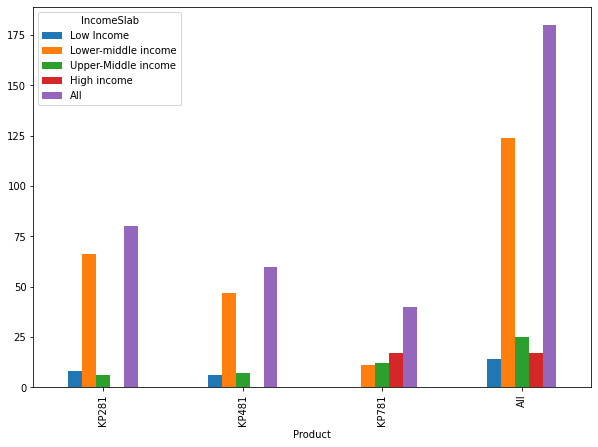

Marginal Probability: what percent of customers have purchased KP281, KP481, or KP781 Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
All      1.000000
Name: All, dtype: float64


In [ ]:
#Product - Incomeslab
crosstab("IncomeSlab")

CrossTab
Fitness  1   2   3   4   5  All
Product                        
KP281    1  14  54   9   2   80
KP481    1  12  39   8   0   60
KP781    0   0   4   7  29   40
All      2  26  97  24  31  180


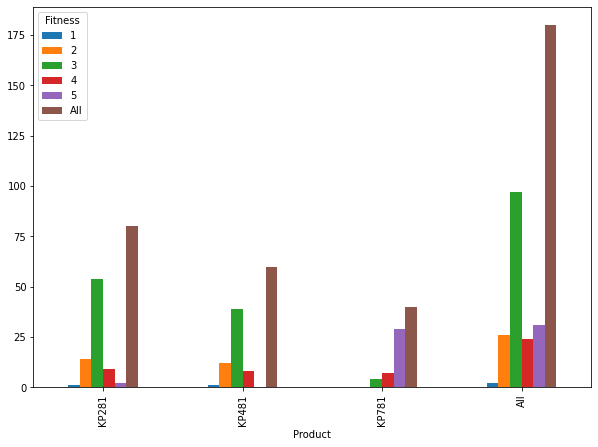

Marginal Probability: what percent of customers have purchased KP281, KP481, or KP781 Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
All      1.000000
Name: All, dtype: float64


In [ ]:
#Product - Fitness
crosstab("Fitness")


CrossTab
AgeCategory  Teens  20s  30s  Above 40s  All
Product                                     
KP281            6   49   19          6   80
KP481            4   31   23          2   60
KP781            0   30    6          4   40
All             10  110   48         12  180


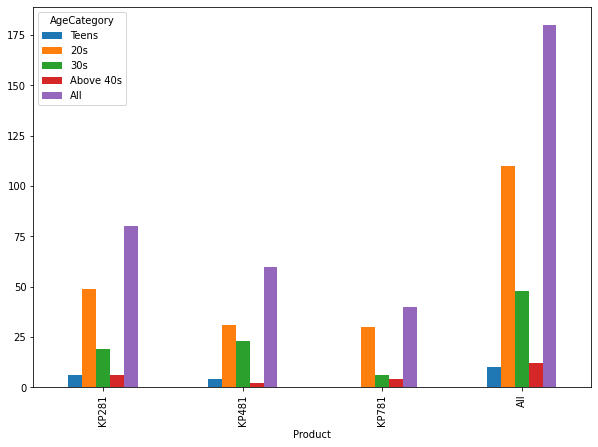

Marginal Probability: what percent of customers have purchased KP281, KP481, or KP781 Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
All      1.000000
Name: All, dtype: float64


In [ ]:
#Product - AgeCategory
crosstab("AgeCategory")


CrossTab
MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180


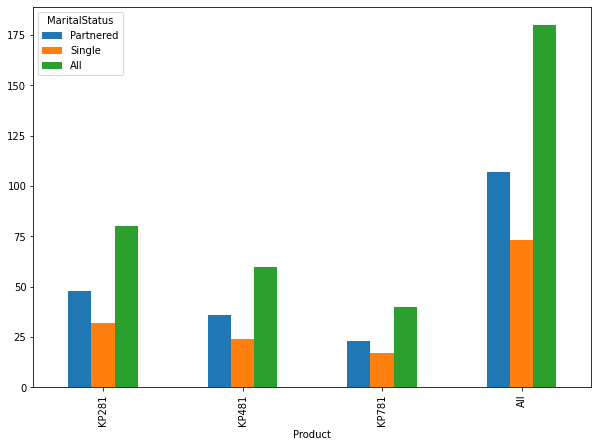

Marginal Probability: what percent of customers have purchased KP281, KP481, or KP781 Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
All      1.000000
Name: All, dtype: float64


In [ ]:
#Product - MaritalStatus
crosstab("MaritalStatus")

<font color='#0dab7f'>
Marginal Probability: what percent of customers have purchased KP281, KP481 or KP781 


<font color='#0dab7f'>KP281 -   0.444444 

<font color='#0dab7f'>KP481 -   0.333333

<font color='#0dab7f'>KP781 -   0.222222

<font color='#0dab7f'>All   -   1.000000


<font color='33A2FF'><b> 6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill? </b></font>

Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180


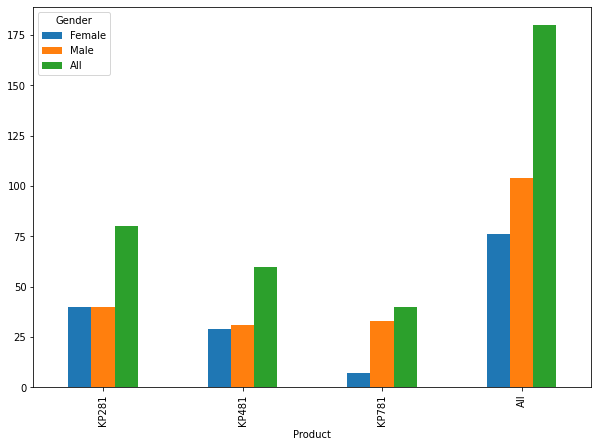

probability of a Male customer buying a KP281, KP481, or KP781 Product
KP281    0.222222
KP481    0.172222
KP781    0.183333
All      0.577778
Name: Male, dtype: float64
probability of a Female customer buying a KP281, KP481, or KP781 Product
KP281    0.222222
KP481    0.161111
KP781    0.038889
All      0.422222
Name: Female, dtype: float64


In [ ]:
crosstab_gender = pd.crosstab(df['Product'], df['Gender'], margins= True)
print(crosstab_gender)
crosstab_gender.plot(kind='bar',figsize=(10,7))
plt.show()
# What is the probability of a male customer buying a KP781 treadmill? 
print("probability of a Male customer buying a KP281, KP481, or KP781",crosstab_gender['Male']/df['Gender'].count())
print("probability of a Female customer buying a KP281, KP481, or KP781",crosstab_gender['Female']/df['Gender'].count())

<font color='#0dab7f'>
Probability of a Male customer buying a KP281, KP481, or KP781 Product 


<font color='#0dab7f'>KP281 -   0.222222

<font color='#0dab7f'>KP481 -   0.172222

<font color='#0dab7f'>KP781 -   0.183333

<font color='#0dab7f'>All   -   0.577778

<font color='#0dab7f'> Probability of a Female customer buying a KP281, KP481, or KP781 Product 


<font color='#0dab7f'>KP281 -   0.222222

<font color='#0dab7f'>KP481 -   0.161111

<font color='#0dab7f'>KP781 -   0.038889

<font color='#0dab7f'>All   -   0.422222

<font color='33A2FF'><b>7. Customer Profiling - Categorization of users. </b></font>


<font color='33A2FF'>**KP281**

<font color='33A2FF'>1) Gender - Both Male and Female Customers purchased equally this product

<font color='33A2FF'>2) Income -  Lower middle Income Customers purchased more this product

<font color='33A2FF'>3) Fitness - Customers having Fitness level 3 purchased more this product

<font color='33A2FF'>4) Age - Customers in Age group of 20's purchased more this product

<font color='33A2FF'>5) Marital Status - Partnered Customers purchased more this product

<font color='33A2FF'>6) Education - Individuals with Education of 14-16 years purchased this product

<font color='33A2FF'>7) Miles - Customers who walks/runs for 78 miles average per week purchased this product

<font color='33A2FF'>8) Usage - Customers who uses Threadmill 3 days a week has shown interest in this product



<font color='33A2FF'>**KP481**

<font color='33A2FF'>1) Gender - Male customers purchased these product little higher when compared to Female

<font color='33A2FF'>2) Income -  Lower middle Income Customers purchased more this product

<font color='33A2FF'>3) Fitness - Customers having Fitness level 3 purchased more this product

<font color='33A2FF'>4) Age - Customers in Age group of 20's purchased more this product

<font color='33A2FF'>5) Marital Status - Partnered Customers purchased more this product

<font color='33A2FF'>6) Education - Individuals with Education of 14-16 years purchased this product

<font color='33A2FF'>7) Miles - Customers who walks/runs for 78 miles average per week purchased this product

<font color='33A2FF'>8) Usage - Customers who uses Threadmill 3 days a week has shown interest in this product



<font color='33A2FF'>**KP781**

<font color='33A2FF'>1) Gender - Male customers purchased these product more when compared to Female customers

<font color='33A2FF'>2) Income -  Higher Income Customers purchased more this product

<font color='33A2FF'>3) Fitness - Customers having Fitness level 5 purchased more this product

<font color='33A2FF'>4) Age - Customers in Age group of 20's purchased more this product

<font color='33A2FF'>5) Marital Status - Partnered Customers purchased more this product

<font color='33A2FF'>6) Education - Individuals with Education of 16-18 years purchased this product

<font color='33A2FF'>7) Miles - Customers who walks/runs for 170 miles average per week purchased this product

<font color='33A2FF'>8) Usage - Customers who uses Threadmill 3 days a week has shown interest in this product


<font color='33A2FF'><b>8. Probability- marginal, conditional probability.</b></font>

In [ ]:
#Percentage of customer with high-Income salary buying treadmill given that Product is KP781 (Conditional Probability)
print("IncomeSlab")
crosstab_IncomeSlab = pd.crosstab(df['Product'], df['IncomeSlab'], margins= True)
print(crosstab_IncomeSlab, "\n")
print("Percentage of customer with high-Income salary buying treadmill given that Product is KP781", 
      (crosstab_IncomeSlab.loc[crosstab_IncomeSlab.index=='KP781']['High income']/df['Income'].count())*100, "\n")

#Percentage of Female customer buying treadmill given that Product is KP281
print("crosstab_gender")
crosstab_gender = pd.crosstab(df['Product'], df['Gender'], margins= True)
print(crosstab_gender, "\n")
print("Percentage of Female customer buying treadmill given that Product is KP281", 
      (crosstab_gender.loc[crosstab_gender.index=='KP281']['Female']/df['Gender'].count())*100, "\n")


#Percentage of customer with fitness level-5 buying KP781 treadmill given that Product is KP781
print("crosstab_fitness")
crosstab_fitness = pd.crosstab(df['Product'], df['Fitness'], margins= True)
print(crosstab_fitness, "\n")
print("Percentage of customer with fitness level-5 buying KP781 treadmill given that Product is KP781", 
      (crosstab_fitness.loc[crosstab_fitness.index=='KP781'][5]/df['Fitness'].count())*100, "\n")

IncomeSlab
IncomeSlab  Low Income  Lower-middle income  Upper-Middle income  High income  \
Product                                                                         
KP281                8                   66                    6            0   
KP481                6                   47                    7            0   
KP781                0                   11                   12           17   
All                 14                  124                   25           17   

IncomeSlab  All  
Product          
KP281        80  
KP481        60  
KP781        40  
All         180   

Percentage of customer with high-Income salary buying treadmill given that Product is KP781 Product
KP781    9.444444
Name: High income, dtype: float64 

crosstab_gender
Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180 

Percentage of Female customer buying treadmill given that 

<font color='#0dab7f'>**CONDITIONAL PROBABILITY**</font>

<font color='#0dab7f'>Percentage of customer with high-Income salary buying treadmill given that Product is KP781 Product = 9.444444 </font>


<font color='#0dab7f'>Percentage of Female customer buying treadmill given that Product is KP281 Product = 22.222222 </font>


<font color='#0dab7f'>Percentage of customer with fitness level-5 buying KP781 treadmill given that Product is KP781 Product = 16.111111 </font>

<font color='33A2FF'><b>9. Recommendations and actionable insights, based on the inferences.</b></font>

<font color='#0dab7f'>1) Fitness company can target the age group 23 to 33 years old and can suggest KP281 product to new customers

<font color='#0dab7f'>2) Fitness company can target:- I) Customers having 16 - 18 years education with KP781 product. II) Customers having 14 - 16 years education with KP281 and KP481 product

<font color='#0dab7f'>3) Fitness company can target:- I) Customers having yearly income 60000 to 90000 dollars with KP781 product. II) Customers having yearly income 45000 to 53000 dollars with KP481 product. III) Customers having yearly income 40000 to 53000 dollars with KP281 product

<font color='#0dab7f'>4) Fitness company can target:- I) Customers who walks/runs for 78 miles average per week with KP281 and KP481 product. II) Customers who walks/runs for 170 miles average per week with KP781 product

<font color='#0dab7f'>5)  Fitness company can target KP281 to new customers

<font color='#0dab7f'>6) Fitness company can target KP281 to partnered customers

<font color='#0dab7f'>7) Fitness company can target to customers who is using 3 days week

<font color='#0dab7f'>8) Fitness company can target to customers who is having fitness scale of 3

<font color='#0dab7f'>9) Fitness company can suggest Advanced product KP781 to Age group 35 to 40 years who is having Education of 18 to 20 years

<font color='#0dab7f'>10) Fitness company can suggest Advanced product KP781 to individuals having more income and high education

<font color='#0dab7f'>11) Fitness company can suggest Advanced product KP781 to individuals having more income and more miles per week


